### 1. **Random Partitioning**
The algorithm works by randomly selecting a feature and a split value, effectively partitioning the data into two subsets. This process is repeated recursively to create a tree structure. Each split helps to isolate instances in the dataset.

### 2. **Isolation Trees**
Multiple isolation trees are constructed to form an ensemble. Each tree is built independently, and the depth of each instance in the tree indicates how isolated it is. Anomalies typically have shorter paths in the trees because they are more distinct and require fewer splits to isolate.

### 3. **Anomaly Score Calculation**
Once the trees are constructed, the algorithm computes an anomaly score for each instance based on the average path length from the root to the instance across all trees. The shorter the average path length, the higher the anomaly score, indicating that the instance is more likely to be an outlier.

### 4. **Contamination Parameter**
The contamination parameter is a key aspect of the Isolation Forest algorithm. It specifies the expected proportion of outliers in the dataset, allowing the model to define a threshold for classifying instances as normal or anomalous. Adjusting this parameter helps in fine-tuning the sensitivity of the model.

## Conclusion
Isolation Forest is a powerful and efficient algorithm for detecting anomalies in various datasets. Its ability to handle large datasets, robustness to noise, interpretability, and versatility make it a popular choice in anomaly detection tasks across different fields. By leveraging random partitioning and ensemble learning, Isolation Forest effectively identifies outliers, providing valuable insights for decision-making processes.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import LabelEncoder

In [2]:
testdata = pd.read_csv("testFeatGen.csv", encoding="utf8",low_memory = False)
validationdata = pd.read_csv("validationFeatGen.csv", encoding="utf8",low_memory = False)
traindata = pd.read_csv("trainFeatGen.csv", encoding="utf8",low_memory = False)

In [3]:
testdata['streamID'] = testdata.index + 1

In [64]:
test_df_iforest = pd.read_csv("/Users/sanatkumargupta/Desktop/ML_Anomaly_Detection/data/test_df_lof.csv", encoding="utf8",low_memory = False)
valid_df_iforest = pd.read_csv("/Users/sanatkumargupta/Desktop/ML_Anomaly_Detection/data/valid_df_lof.csv", encoding="utf8",low_memory = False)
train_t_df_iforest = pd.read_csv("/Users/sanatkumargupta/Desktop/ML_Anomaly_Detection/data/train_t_df_lof.csv", encoding="utf8",low_memory = False)
train_v_df_iforest = pd.read_csv("/Users/sanatkumargupta/Desktop/ML_Anomaly_Detection/data/train_v_df_lof.csv", encoding="utf8",low_memory = False)

**iForest**

Contamination 0.01
Test

In [9]:
from sklearn.ensemble import IsolationForest

In [10]:
%%time
iForest_t_1 = IsolationForest(contamination = .01)
iForest_t_1.fit(train_t_df_iforest)

CPU times: user 423 ms, sys: 32.9 ms, total: 456 ms
Wall time: 654 ms


IsolationForest(contamination=0.01)

In [11]:
%%time
labels_t = iForest_t_1.predict(test_df_iforest)

CPU times: user 17.4 ms, sys: 4.58 ms, total: 22 ms
Wall time: 34.6 ms


In [12]:
testresult_t_1 = copy.deepcopy(testdata)

In [13]:
testresult_t_1["iForest"] = pd.Series(labels_t)
testresult_t_1["iForest"] = testresult_t_1["iForest"].map({1: 0, -1: 1})
print(testresult_t_1["iForest"].value_counts())

iForest
0    298
1      2
Name: count, dtype: int64


In [14]:
testresult_t_1plot = testresult_t_1[testresult_t_1.iForest==1]

<Axes: ylabel='count'>

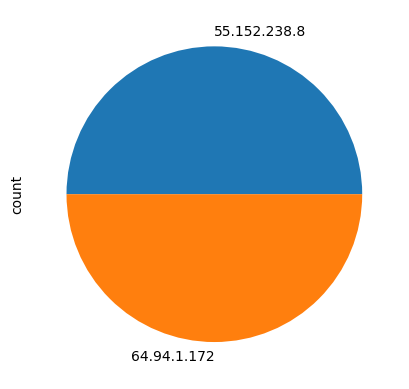

In [16]:
testresult_t_1plot.source_ip.value_counts()[:15].plot.pie()

<Axes: ylabel='count'>

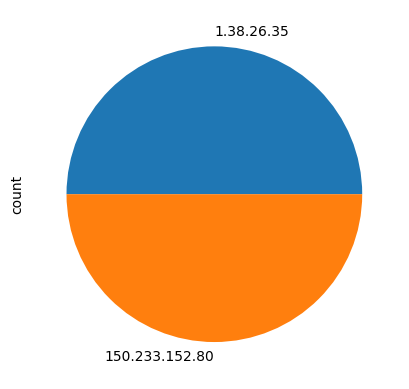

In [18]:
testresult_t_1plot.destination_ip.value_counts()[:15].plot.pie()

In [19]:
from sklearn.decomposition import IncrementalPCA
ipca_img = IncrementalPCA(n_components = 2, whiten = True, batch_size = 10)
ipca_img.fit(train_t_df_iforest)

IncrementalPCA(batch_size=10, n_components=2, whiten=True)

In [20]:
reduced_test_data_iforest = ipca_img.transform(test_df_iforest)

In [21]:
iforest_plot_df = testresult_t_1[['iForest']]

In [23]:
iforest_plot_df.loc[:, 'x'] = reduced_test_data_iforest[:, 0]
iforest_plot_df.loc[:, 'y'] = reduced_test_data_iforest[:, 1]

In [24]:
import seaborn as sns

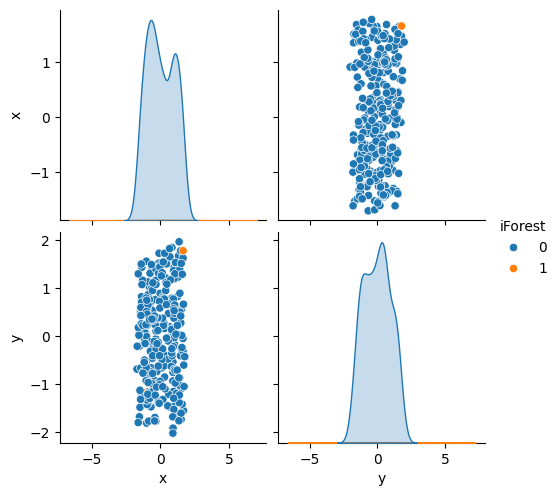

In [25]:
plot_if_001_allfeat = sns.pairplot(iforest_plot_df, hue = 'iForest')

In [26]:
plot_if_001_allfeat

In [27]:
plot_if_001_allfeat.savefig('plot_if_001_allfeat.png')

In [28]:
testresult_t_1plot.to_csv('test_result_iforest_001_allfeat.csv',index=False)

**IPCA**

In [29]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components = 5, whiten = True, batch_size = 10)
ipca.fit(train_t_df_iforest)

IncrementalPCA(batch_size=10, n_components=5, whiten=True)

In [30]:
train_t_df_iforest_ipca = ipca.transform(train_t_df_iforest)
test_df_iforest_ipca = ipca.transform(test_df_iforest)

**Test**

In [31]:
%%time
iForest_t_2 = IsolationForest(contamination = .01)
iForest_t_2.fit(train_t_df_iforest_ipca)

CPU times: user 390 ms, sys: 25.2 ms, total: 416 ms
Wall time: 497 ms


IsolationForest(contamination=0.01)

In [32]:
%%time
labels_t_2 = iForest_t_2.predict(test_df_iforest_ipca)

CPU times: user 15.6 ms, sys: 4.83 ms, total: 20.4 ms
Wall time: 38.8 ms


In [33]:
testresult_t_2 = copy.deepcopy(testdata)

In [34]:
testresult_t_2["iForest"] = pd.Series(labels_t_2)
testresult_t_2["iForest"] = testresult_t_2["iForest"].map({1: 0, -1: 1})
print(testresult_t_2["iForest"].value_counts())

iForest
0    296
1      4
Name: count, dtype: int64


In [35]:
testresult_t_2plot = testresult_t_2[testresult_t_2.iForest==1]

<Axes: ylabel='count'>

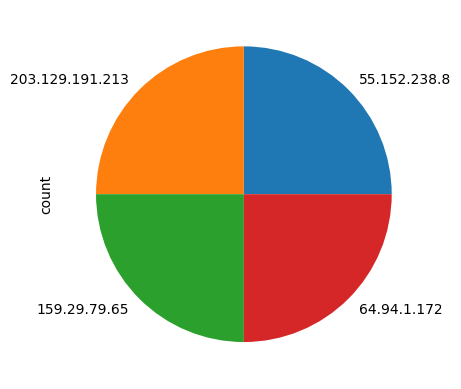

In [37]:
testresult_t_2plot.source_ip.value_counts()[:15].plot.pie()

<Axes: ylabel='count'>

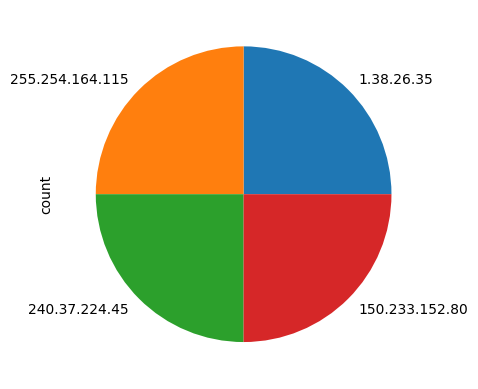

In [39]:
testresult_t_2plot.destination_ip.value_counts()[:15].plot.pie()

In [40]:
iforest_plot_df_ipca = testresult_t_2[['iForest']]

In [42]:
iforest_plot_df_ipca.loc[:, 'pc1'] = test_df_iforest_ipca[:, 0]
iforest_plot_df_ipca.loc[:, 'pc2'] = test_df_iforest_ipca[:, 1]
iforest_plot_df_ipca.loc[:, 'pc3'] = test_df_iforest_ipca[:, 2]
iforest_plot_df_ipca.loc[:, 'pc4'] = test_df_iforest_ipca[:, 3]
iforest_plot_df_ipca.loc[:, 'pc5'] = test_df_iforest_ipca[:, 4]

In [43]:
import seaborn as sns

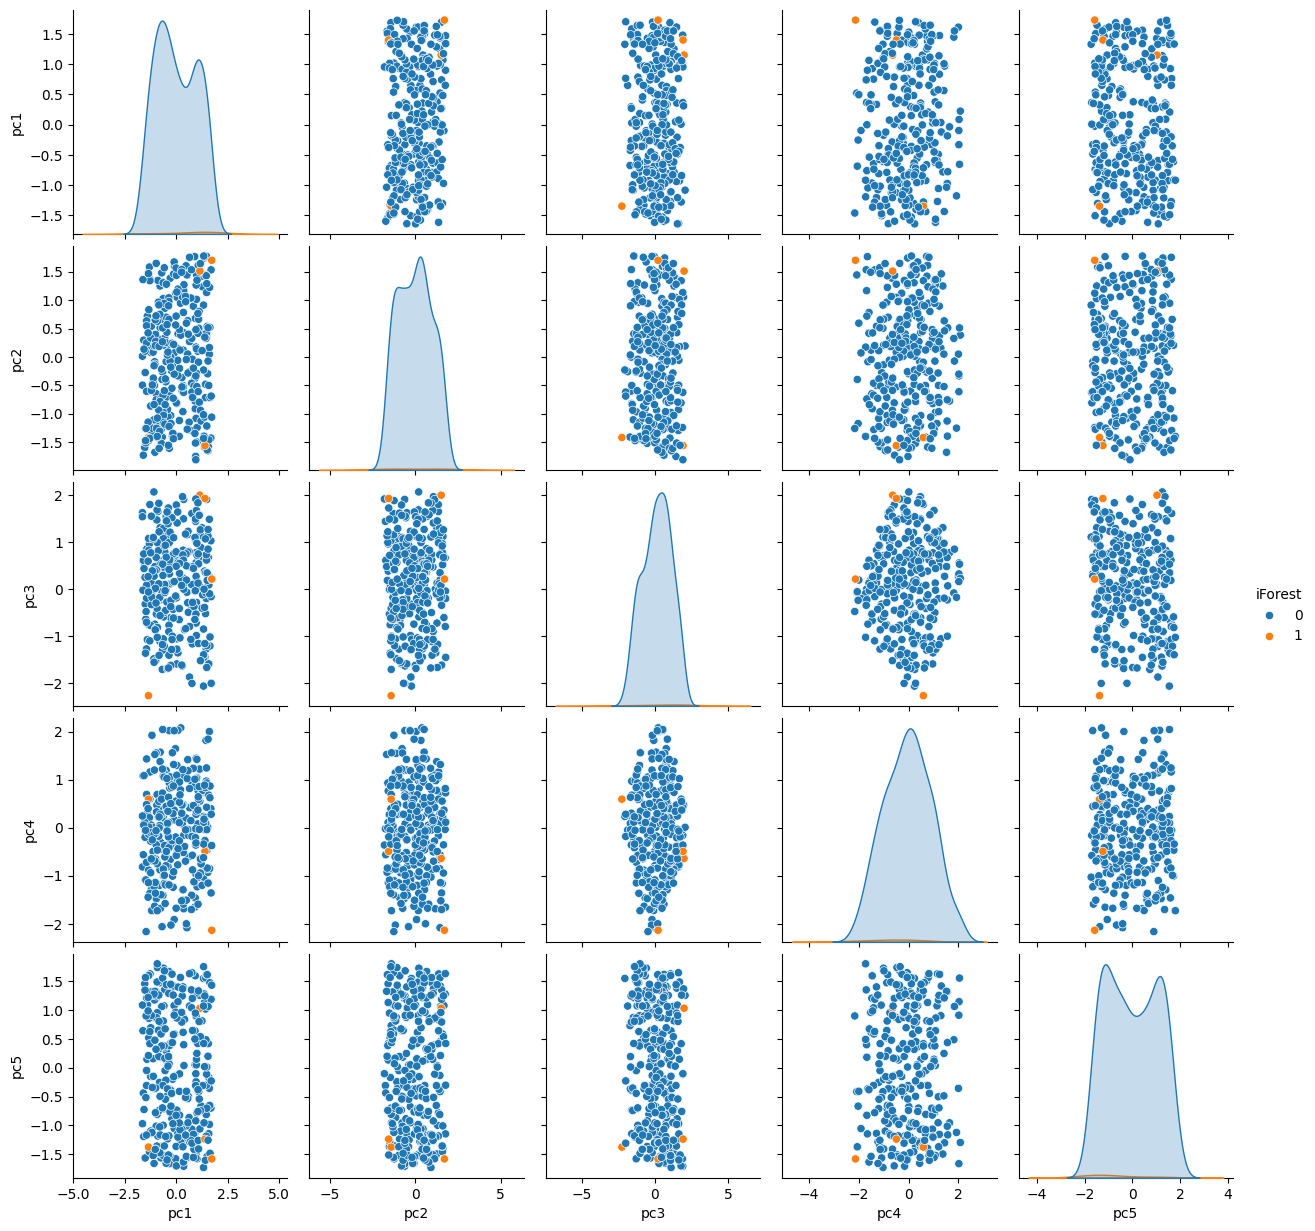

In [44]:
plot_if_001_ipca = sns.pairplot(iforest_plot_df_ipca, hue = 'iForest')

In [45]:
plot_if_001_ipca
plot_if_001_ipca.savefig('plot_if_001_ipca.png')
testresult_t_2plot.to_csv('test_result_iforest_001_ipca.csv',index=False)

**Variance threshold**

In [46]:
from sklearn.feature_selection import VarianceThreshold
threshold = VarianceThreshold(threshold = .95)
train_t_df_iforest_var = threshold.fit_transform(train_t_df_iforest)
threshold.variances_

array([7.63396004e+03, 8.63999051e+04, 8.57052832e+08, 5.37213692e+08,
       3.51432676e+08, 3.59531038e+08])

In [47]:
train_t_df_iforest

,duration,total_packets,bytes_transferred_total,bytes_transferred_source_to_dest,source_port,destination_port
0,187.544397,32,9174,29429,46694,46671
1,186.883395,532,92985,22724,55170,63302
2,44.221391,53,27007,9609,16262,46037
3,163.167313,718,87625,32302,61448,33478
4,115.881773,731,8724,26154,25831,47425
...,...,...,...,...,...,...
995,113.073890,322,14653,55660,12825,30260
996,264.198992,231,53265,23975,21981,4835
997,218.655561,711,57554,36326,55398,31392
998,31.340801,487,7059,23739,3604,37098


In [48]:
train_t_df_iforest_var = train_t_df_iforest.loc[:, threshold.get_support()]

In [51]:
train_t_df_iforest_var = train_t_df_iforest.drop(['source_type_of_service', 'destination_type_of_service'], axis=1)
train_v_df_iforest_var = train_v_df_iforest.drop(['source_type_of_service', 'destination_type_of_service'], axis=1)
test_df_iforest_var = test_df_iforest.drop(['source_type_of_service', 'destination_type_of_service'], axis=1)
valid_df_iforest_var = valid_df_iforest.drop(['source_type_of_service', 'destination_type_of_service'], axis=1)

KeyError: "['source_type_of_service', 'destination_type_of_service'] not found in axis"

Error: because source_type_of_service, destination_type_of_service are not present, so we can directly proceed.

**Test**

In [65]:
%%time
iForest_t_3 = IsolationForest(contamination = .01)
iForest_t_3.fit(train_t_df_iforest_var)

CPU times: user 392 ms, sys: 26.4 ms, total: 418 ms
Wall time: 528 ms


IsolationForest(contamination=0.01)

In [67]:
%%time
labels_t_3 = iForest_t_3.predict(test_df_iforest)

CPU times: user 18.1 ms, sys: 5.47 ms, total: 23.5 ms
Wall time: 27.3 ms


In [68]:
testresult_t_3 = copy.deepcopy(testdata)

In [69]:
testresult_t_3["iForest"] = pd.Series(labels_t_3)
testresult_t_3["iForest"] = testresult_t_3["iForest"].map({1: 0, -1: 1})
print(testresult_t_3["iForest"].value_counts())

iForest
0    297
1      3
Name: count, dtype: int64


<Axes: ylabel='count'>

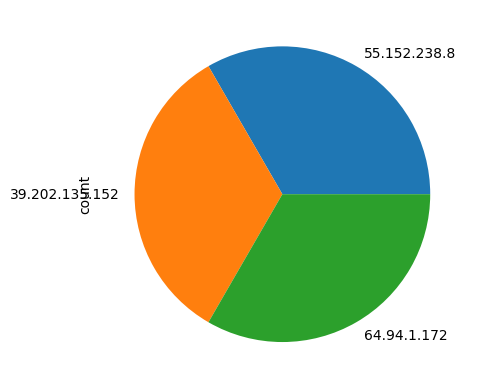

In [71]:
testresult_t_3plot = testresult_t_3[testresult_t_3.iForest==1]
testresult_t_3plot.source_ip.value_counts()[:15].plot.pie()

<Axes: ylabel='count'>

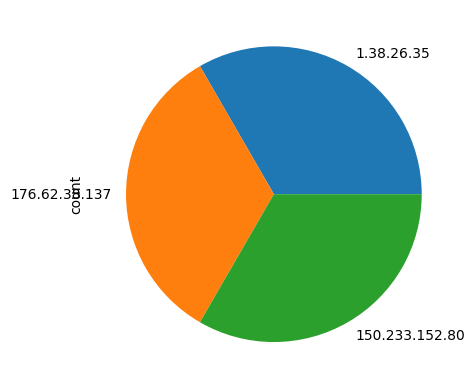

In [73]:
testresult_t_3plot.destination_ip.value_counts()[:15].plot.pie()

In [74]:
from sklearn.decomposition import IncrementalPCA
ipca_img_var = IncrementalPCA(n_components = 2, whiten = True, batch_size = 10)
ipca_img_var.fit(train_t_df_iforest_var)

IncrementalPCA(batch_size=10, n_components=2, whiten=True)

In [77]:
reduced_test_data_iforest = ipca_img_var.transform(test_df_iforest)

In [78]:
iforest_plot_df_var = testresult_t_3[['iForest']]

In [85]:
iforest_plot_df_var['x'] = reduced_test_data_iforest[:, 0]
iforest_plot_df_var['y'] = reduced_test_data_iforest[:, 1]

/var/folders/kp/h41tpkfx20bf_t__gy8q3vj40000gn/T/ipykernel_6493/2354740711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iforest_plot_df_var['x'] = reduced_test_data_iforest[:, 0]
/var/folders/kp/h41tpkfx20bf_t__gy8q3vj40000gn/T/ipykernel_6493/2354740711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iforest_plot_df_var['y'] = reduced_test_data_iforest[:, 1]


In [86]:
import seaborn as sns

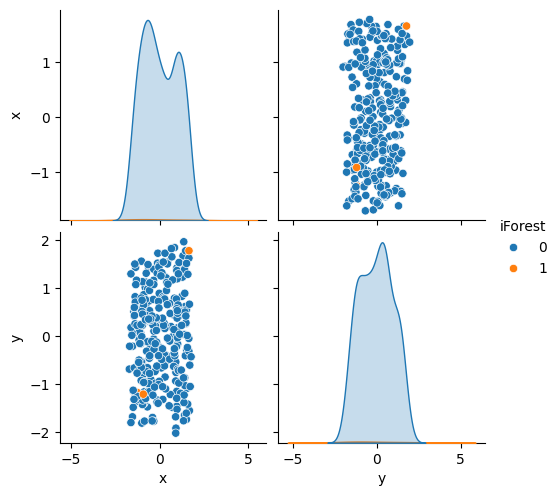

In [87]:
plot_if_001_var = sns.pairplot(iforest_plot_df_var, hue = 'iForest')

In [88]:
plot_if_001_var

In [89]:
plot_if_001_var.savefig('plot_if_001_var.png')

In [90]:
testresult_t_3plot.to_csv('test_result_iforest_001_var.csv',index=False)